In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import rcParams

from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy

from scipy.odr import *


main_dir = "/Volumes/FLASH/School/S2017/PHYS274L/Lab9/"

In [14]:
## -- Linear Function
def linear(x,m,c):
    return (x*m)+c

## -- Chi-2
def chisqg(ydata,ymod,sd=None):  
  """  
Returns the chi-square error statistic as the sum of squared errors between  
Ydata(i) and Ymodel(i). If individual standard deviations (array sd) are supplied,   
then the chi-square error statistic is computed as the sum of squared errors  
divided by the standard deviations.     Inspired on the IDL procedure linfit.pro.  
See http://en.wikipedia.org/wiki/Goodness_of_fit for reference.  

x,y,sd assumed to be Numpy arrays. a,b scalars.  
Returns the float chisq with the chi-square statistic.  

Rodrigo Nemmen  
http://goo.gl/8S1Oo  
  """  
  # Chi-square statistic (Bevington, eq. 6.9)  
  if sd==None:  
       chisq=np.sum((ydata-ymod)**2)  
  else:  
       chisq=np.sum( ((ydata-ymod)/sd)**2 )  

  return chisq  

In [21]:
## -- Measurements
length = ufloat(0.0244, 0.0001)
width = ufloat(0.0098, 0.0001)
thickness = ufloat(0.0015, 0.0001)
temp = ufloat(293.15,1.0) #Kelvin


In [16]:
data = np.genfromtxt(main_dir+"data.txt", delimiter=',')
#inv_T = data[:,10] ## 1/ K
#ln_sigma = data[:,9] ##
T = unumpy.uarray(data[:,0], data[:,1]) #milliV

V = unumpy.uarray(data[:,2], data[:,3]) #V

I = unumpy.uarray(data[:,4], data[:,5]) #mA

In [22]:
## -- Calculations

T_V = T * 10**(-3)
T_K = (T_V)/(0.00004)+temp
inv_T = 1.0/T_K

sigma = (I*1000.0*length)/(V*(width*thickness))
ln_sigma = unumpy.log(sigma)

Plot 1:
Chi-2: 0.000449384839569
Slope: -3905.07667782 +/- 9.38218015068
Intercept: 27.793507526 +/- 0.0279058303515


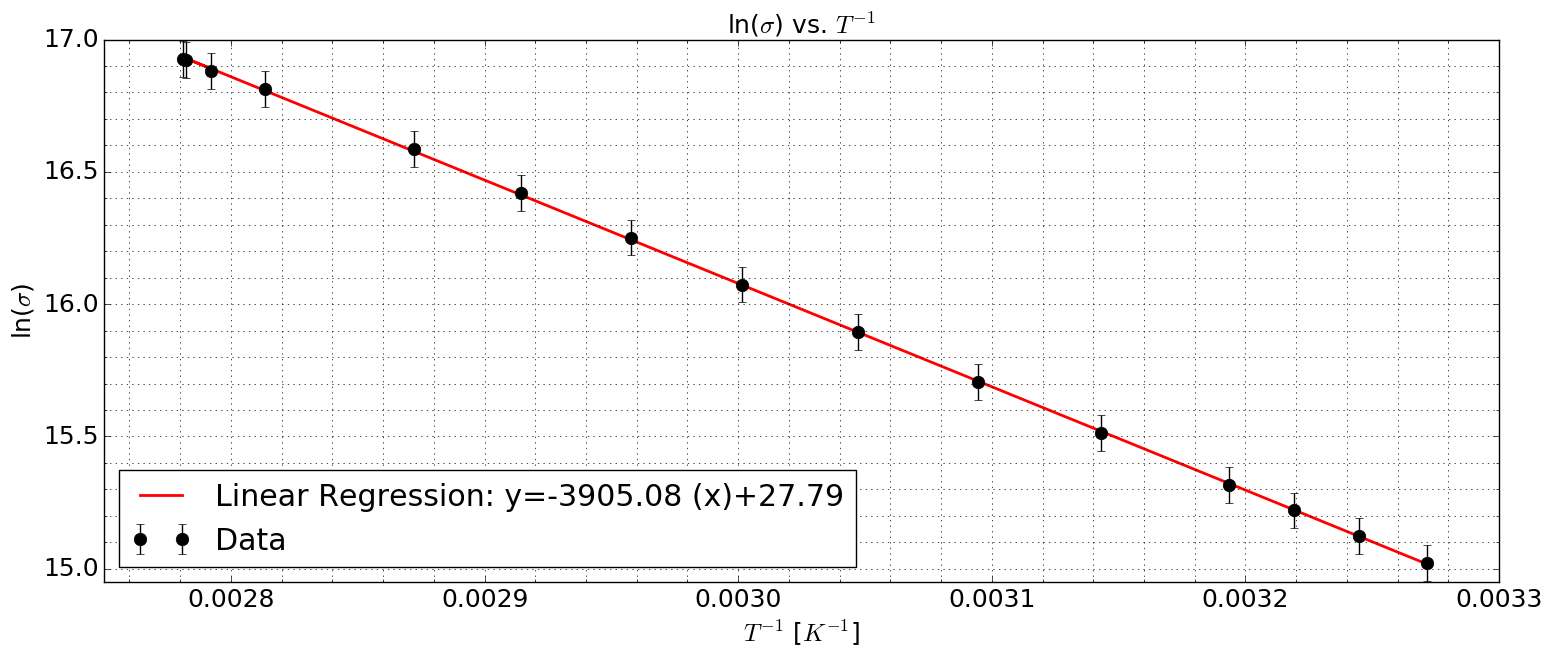

In [37]:
## --- Plotting
X = unumpy.nominal_values(inv_T)
d_X = unumpy.std_devs(inv_T)
Y = unumpy.nominal_values(ln_sigma)
d_Y = unumpy.std_devs(ln_sigma)

## -- Weighted Linear Regression
popt, pcov = curve_fit(linear, X, Y, 
                       sigma=d_X)

plt.clf()
rcParams['figure.figsize'] = 18, 7
rcParams.update({'font.size': 18})
plt.minorticks_on()

plt.plot(X, linear(X, *popt), "r-", linewidth=2.0, 
         label="Linear Regression: y="+str(round(popt[0], 2))+" (x)+"+str(round(popt[1], 2)))


plt.errorbar(X, Y, yerr=d_Y, fmt='.', label="Data", 
             color="k", ms=18)

plt.title("ln($\sigma$) vs. $T^{-1}$", fontsize=18)
plt.ylabel("ln($\sigma$)", fontsize=18)
plt.ylim(14.95, 17.0)
plt.xlabel("$T^{-1}$ [$K^{-1}$]", fontsize=18)
plt.xlim(0.00275, 0.0033)
plt.legend(loc=3)
plt.grid(b=True, which='minor', linestyle=':')
plt.grid(b=True, which='major', linestyle=':')


chi2 = chisqg(Y, linear(X, *popt))

print("Plot 1:")
print("Chi-2: %s")%(chi2)
print("Slope: %s +/- %s") %(popt[0], np.sqrt(pcov[0,0]))
print("Intercept: %s +/- %s") %(popt[1], np.sqrt(pcov[1,1]))

plt.savefig(main_dir+"plot.png", bbox_inches='tight')



In [24]:
## --- Calculations
slope = ufloat(popt[0], np.sqrt(pcov[0,0]))
intercept = ufloat(popt[1], np.sqrt(pcov[1,1]))

E_G = 2.0*slope*(0.0000861733)
E_theo = -0.67
print("Band Gap Energy: %s [eV]")%(E_G)
print("Z-Score: %s")%((E_theo - E_G.n)/round(E_G.s, 3))

Band Gap Energy: -0.6730+/-0.0016 [eV]
Z-Score: 1.51334408044
